In [40]:
import keras

In [41]:
from keras.datasets import mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

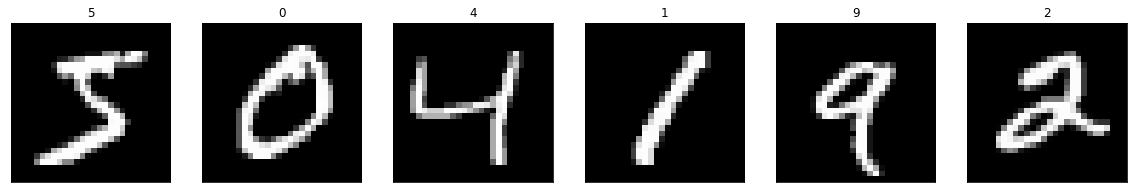

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plot first six training images
fig = plt.figure(figsize =(20,20))
for i in range(6):
    ax = fig.add_subplot(1,6,i+1,xticks = [],yticks=[])
    ax.imshow(X_train[i],cmap='gray')
    ax.set_title(str(y_train[i]))

In [ ]:
# visualize image
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [43]:
# rescale  [0,255] ->[0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [44]:
from keras.utils import np_utils

# print first ten(integer-valued) training labels
print('Integer-valued labesl:')
print(y_train[:10])

# one-hot encode the labels
#Converts a class vector (integers) to binary class matrix.
#tf.keras.utils.to_categorical(y, num_classes=None, dtype="float32") 
#y is the class vector,num_classes:total number of classes.
y_train = np_utils.to_categorical(y_train,10)  
y_test = np_utils.to_categorical(y_test,10)

#print first ten(one-hot) training labels
print('One-hot labels:')
print(y_train[:10])


Integer-valued labesl:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [45]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout

In [46]:
# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
# summarize the model
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
________________________________________________

In [47]:
#compile the model
model.compile(loss ='categorical_crossentropy',optimizer='rmsprop',metrics = ['accuracy'])

In [ ]:
#before training
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

In [48]:
from keras.callbacks import ModelCheckpoint
# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5',verbose=1,save_best_only=True)
hist = model.fit(X_train,y_train,batch_size= 128,epochs=10,validation_split=0.2,callbacks=[checkpointer],verbose=1,shuffle=True)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 78us/step - loss: 0.2803 - accuracy: 0.9135 - val_loss: 0.1250 - val_accuracy: 0.9608

Epoch 00001: val_loss improved from inf to 0.12504, saving model to mnist.model.best.hdf5
Epoch 2/10
48000/48000 [==============================] - 4s 77us/step - loss: 0.1138 - accuracy: 0.9650 - val_loss: 0.1004 - val_accuracy: 0.9699

Epoch 00002: val_loss improved from 0.12504 to 0.10044, saving model to mnist.model.best.hdf5
Epoch 3/10
48000/48000 [==============================] - 4s 76us/step - loss: 0.0794 - accuracy: 0.9752 - val_loss: 0.0917 - val_accuracy: 0.9746

Epoch 00003: val_loss improved from 0.10044 to 0.09169, saving model to mnist.model.best.hdf5
Epoch 4/10
48000/48000 [==============================] - 4s 77us/step - loss: 0.0621 - accuracy: 0.9805 - val_loss: 0.0941 - val_accuracy: 0.9749

Epoch 00004: val_loss did not improve from 0.09169
Epoch 5/10
48000/48000 [=====

In [ ]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [49]:
#evaluate test accuracy
score = model.evaluate(X_test,y_test,verbose=0)
accuracy = 100*score[1]
print("Test accuracy: {:.4f}".format(accuracy))

Test accuracy: 98.2900
